# PP5 - ML Brain Tumor Detector

## Notebook 3 - Modelling and Evaluation

### Objectives



### Inputs

| **input**      |          |       |
|-----------------|----------|-------|
| **train/**      | no_tumor | tumor |
| **test/**       | no_tumor | tumor |
| **validation/** | no_tumor | tumor |


### Outputs




### Additional Comments

* Dataset: [Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?select=Training)
* License: [MIT](https://www.mit.edu/~amini/LICENSE.md)

---

## Set Data Directory

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Set Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tobis\\Documents\\GitHub\\ml-brain-tumor-detection\\jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("New directory set!")

New directory set!


In [5]:
working_dir = os.getcwd()
working_dir

'c:\\Users\\tobis\\Documents\\GitHub\\ml-brain-tumor-detection'

### Set Input Directory

In [6]:
data_dir= 'input/brain-mri-scans'
train_path = data_dir + '/train'
val_path = data_dir + '/validation'
test_path = data_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")


Train Set Path: input/brain-mri-scans/train
Validation Set Path: input/brain-mri-scans/validation
Test Set Path: input/brain-mri-scans/test


### Set Output Directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

Old version is already available create a new version.
outputs/v1


### Set Label Names

In [8]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['no_tumor', 'tumor']


### Set Image Shape

In [9]:
image_shape = joblib.load(filename=f"outputs/{version}/avg_image_shape_train.pkl")
image_shape

(470, 467, 3)

---

## Number of images in train, test and validation data

* test - no_tumor: 100 images
* test - tumor: 554 images
* train - no_tumor: 350 images
* train - tumor: 1934 images
* validation - no_tumor: 50 images
* validation - tumor: 276 images




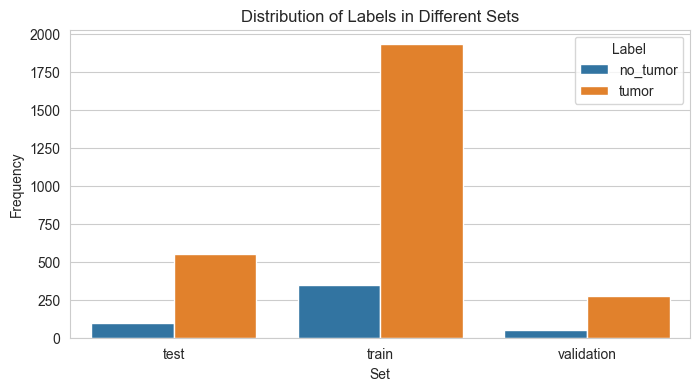

Total data across all labels: 3264
Total data in no_tumor: 500
Total data in tumor: 2764



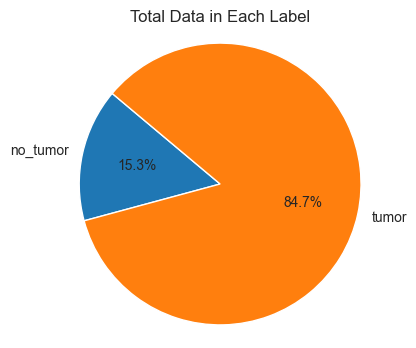

In [40]:
data = []
for folder in ['test', 'train', 'validation']:
    folder_path = os.path.join(data_dir, folder)
    for label in labels:
        label_path = os.path.join(folder_path, label)
        frequency = len(os.listdir(label_path))
        data.append({'Set': folder, 'Label': label, 'Frequency': frequency})
        print(f"* {folder} - {label}: {frequency} images")

print("\n")

# DataFrame
df_freq = pd.DataFrame(data)

# Calculate total data across all labels
total_data_all_labels = df_freq['Frequency'].sum()

# Calculate total data in each label
total_data_per_label = df_freq.groupby('Label')['Frequency'].sum()

# Generate string output
string_output = f"Total data across all labels: {total_data_all_labels}\n"
for label, total in total_data_per_label.items():
    string_output += f"Total data in {label}: {total}\n"


# Plotting the bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.title('Distribution of Labels in Different Sets')
plt.xlabel('Set')
plt.ylabel('Frequency')
plt.savefig(f'{file_path}/labels_distribution_bar.png', bbox_inches='tight', dpi=150)
plt.show()

# Plotting total data string
print(string_output)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(total_data_per_label, labels=total_data_per_label.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Data in Each Label')
plt.axis('equal')
plt.savefig(f'{file_path}/labels_pie_chart.png', bbox_inches='tight', dpi=150)
plt.show()

### Conclusion of Dataset distribution

As we can see, the data in each label for "no_tumor" and "tumor" is highly imbalanced. This could pose challanges for data analysis such as:
+ **Bias in Model Training:**  
Class imbalances can lead to bias in model training, where the model may become more biased towards the majority class. In this case the "tumor" images.

+ **Poor Generalization:**  
    Models trained on imbalanced datasets may have difficulty generalizing well to unseen data, especially for the minority class.

+ **Evaluation Metrics:**
Traditional evaluation metrics such as accuracy may not provide an accurate representation of the model's performance, especially in imbalanced datasets. For instance, a model that always predicts the majority class (tumor) would achieve high accuracy but provide little to no value in detecting the minority class (no_tumor).

+ **Decision Boundaries:**  
Imbalance in the dataset can influence the decision boundaries learned by the model, potentially leading to misclassification of the minority class instances.

To combat these issues, it is essential to address the class imbalance through techniques such as:
+ **Data Resampling:**  
Oversampling the minority class or undersampling the majority class to balance the dataset.

+ **Data Augmentation:**  
Introduce variations to existing data samples, such as rotation, scaling, flipping, cropping, or adding noise. This can help in creating additional training examples, especially for the minority class.

+ **Evaluation Metrics:**  
Focusing on metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) that provide insights into the model's performance across different classes.